In [2]:
import numpy as np
import matplotlib.pyplot as plt
from helper.pre_process_target_input import inverse_normalize, normalize
import torch

In [3]:
num_bins = 32

# from linspace_binning_params.csv :
min_data_normed = -0.6580503063096017
max_data_normed = 15.41145449697189

# from data_set_statistcis_dict.csv
mean_filtered_log_data = 0.2649270623955788
std_filtered_log_data = 0.4032066644692276

transform_f = lambda x: np.log(x + 1) if isinstance(x, np.ndarray) else torch.log(x + 1)

In [4]:
min_data_inv_normed = inverse_normalize_data(
    np.array(min_data_normed),
    mean_filtered_log_data, std_filtered_log_data)

max_data_inv_normed = inverse_normalize_data(
    np.array(max_data_normed),
    mean_filtered_log_data, std_filtered_log_data)

print(f'min_data_inv_normed: {min_data_inv_normed}')
print(f'max_data_inv_normed: {max_data_inv_normed}')

min_data_inv_normed: -0.00040312538758624505
max_data_inv_normed: 650.272554266488


In [5]:
cut_off_last_bin_inv_normed = 100

In [6]:
cut_off_last_bin_normed = normalize_data(torch.Tensor([cut_off_last_bin_inv_normed]), mean_filtered_log_data, std_filtered_log_data)
print(f'cut_off_last_bin_normed: {cut_off_last_bin_normed}')

cut_off_last_bin_normed: tensor([10.7890])


In [7]:
    linspace_binning_normed = np.linspace(
        min_data_normed,
        cut_off_last_bin_normed,
        num=num_bins-1,
        endpoint=True) 

In [8]:
linspace_binning_normed

array([[-0.6580503 ],
       [-0.27648222],
       [ 0.10508585],
       [ 0.48665392],
       [ 0.868222  ],
       [ 1.2497901 ],
       [ 1.6313581 ],
       [ 2.0129263 ],
       [ 2.3944943 ],
       [ 2.7760623 ],
       [ 3.1576304 ],
       [ 3.5391986 ],
       [ 3.9207666 ],
       [ 4.302335  ],
       [ 4.6839027 ],
       [ 5.0654707 ],
       [ 5.4470387 ],
       [ 5.8286066 ],
       [ 6.2101746 ],
       [ 6.5917435 ],
       [ 6.9733114 ],
       [ 7.3548794 ],
       [ 7.7364473 ],
       [ 8.118015  ],
       [ 8.499583  ],
       [ 8.881151  ],
       [ 9.262719  ],
       [ 9.644287  ],
       [10.025856  ],
       [10.407424  ],
       [10.788992  ]], dtype=float32)

In [9]:
linspace_binning_inv_normed = inverse_normalize_data(linspace_binning_normed, mean_filtered_log_data, std_filtered_log_data)

In [10]:
linspace_binning_inv_normed

array([[-4.0316582e-04],
       [ 1.6584671e-01],
       [ 3.5974658e-01],
       [ 5.8589542e-01],
       [ 8.4965658e-01],
       [ 1.1572857e+00],
       [ 1.5160787e+00],
       [ 1.9345450e+00],
       [ 2.4226091e+00],
       [ 2.9918463e+00],
       [ 3.6557574e+00],
       [ 4.4300890e+00],
       [ 5.3332038e+00],
       [ 6.3865232e+00],
       [ 7.6150265e+00],
       [ 9.0478506e+00],
       [ 1.0718978e+01],
       [ 1.2668041e+01],
       [ 1.4941262e+01],
       [ 1.7592571e+01],
       [ 2.0684830e+01],
       [ 2.4291376e+01],
       [ 2.8497759e+01],
       [ 3.3403732e+01],
       [ 3.9125656e+01],
       [ 4.5799225e+01],
       [ 5.3582714e+01],
       [ 6.2660725e+01],
       [ 7.3248596e+01],
       [ 8.5597404e+01],
       [ 9.9999992e+01]], dtype=float32)

In [11]:
max_data_inv_normed

650.272554266488

In [15]:
all_bins_inv_normed = np.append(linspace_binning_inv_normed, max_data_inv_normed)
# all_bins_inv_normed = linspace_binning_inv_normed

Text(0, 0.5, 'Precipitation in mm')

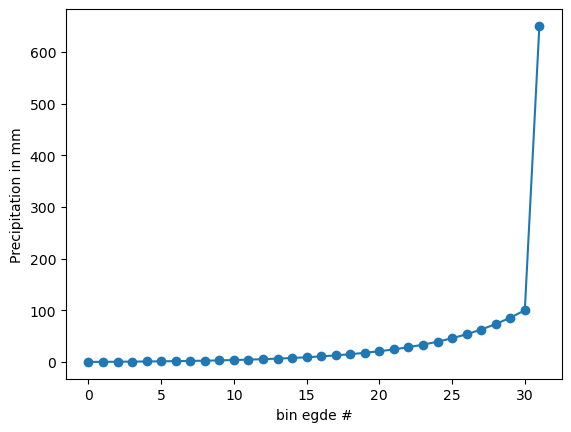

In [16]:
plt.plot(all_bins_inv_normed)
plt.scatter(np.arange(len(all_bins_inv_normed)), all_bins_inv_normed)
plt.xlabel('bin egde #')
plt.ylabel('Precipitation in mm')
# plt.yscale('log')